<a href="https://colab.research.google.com/github/Pasinduteshan7/Linear-and-Polynomial-Regression/blob/main/Linear_regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***task*** : predict student score given the number of hours spent by the student for studies

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/macine learning/SLLIT/SLLIT/linear regression/w1_student_scores-220925-152435.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0, 0.5, 'Scores')

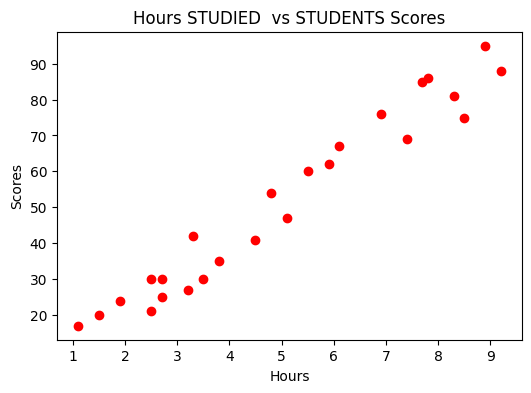

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(df['Hours'],df['Scores'],'ro')
plt.title('Hours STUDIED  vs STUDENTS Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')

**Find Coeffients**

calculate the mean of input and output

In [5]:
xmean = np.mean(df['Hours'])
ymean = np.mean(df['Scores'])

Calculate the terms needed for the numarater and denominator of beta

For each student:

Take their number of Hours

Subtract the average Hours

Take their Score

Subtract the average Score

Multiply these two results

This gives the covariance contribution for each row.

 These values are used to calculate the slope of your linear regression.

In [6]:
df['xycov'] = (df['Hours'] - xmean) * (df['Scores'] - ymean)



For each student:

Take their Hours value

Subtract the mean Hours

Square the value

This produces the variance contribution of X.

These squared differences help calculate total variance of X.

In [7]:
df['xvar'] = (df['Hours'] - xmean)**2

Why do we calculate these?

Because the slope (m) of the regression line:
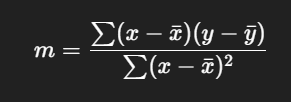





Your two lines compute:

numerator values → xycov

denominator values → xvar

In [8]:
slope = df['xycov'].sum() / df['xvar'].sum()
intercept = ymean - (slope * xmean)
print(f'slope = {slope}')
print(f'intercept = {intercept}')


slope = 9.775803390787473
intercept = 2.4836734053731817


Making prediction


In [9]:
intercept + slope*7

np.float64(70.9142971408855)

In [10]:
Scores_Predicted = intercept + slope * df['Hours']

compute the score of student who studied for 7 hours

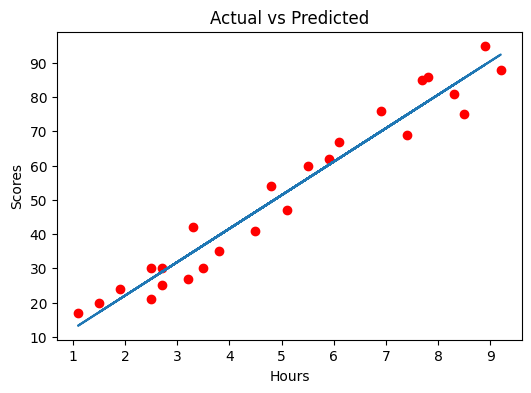

In [11]:
plt.figure(figsize=(6,4))

plt.plot(df['Hours'],df['Scores'],'ro')
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(df['Hours'],Scores_Predicted)
plt.show()

Multiple Linear Regression

*task*: Predict petrol consumption of a country given various factores such as tax,diatance of highways and popuation with driving licence

In [12]:
df = pd.read_csv('/content/drive/MyDrive/macine learning/SLLIT/SLLIT/linear regression/w1_petrol_consumption-220925-152435.csv')

In [13]:
df.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [14]:
df.shape

(48, 5)

In [15]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


u can see there are five variables so this have to plot in 5 dimentional space.it cant be done so we are going to plot it 2 variables at once

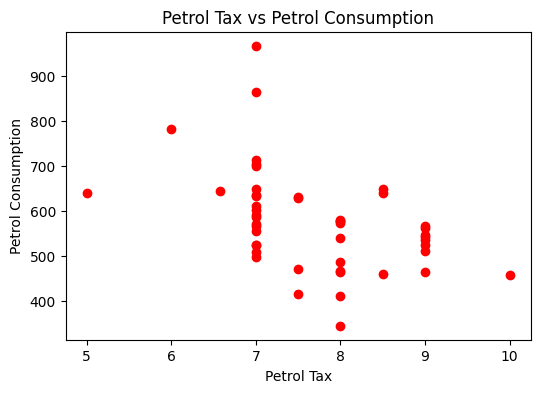

In [16]:
plt.figure(figsize=(6,4))
plt.scatter(df['Petrol_tax'],df['Petrol_Consumption'],c='r',marker='o')
plt.title('Petrol Tax vs Petrol Consumption')
plt.xlabel('Petrol Tax')
plt.ylabel('Petrol Consumption')
plt.show()

u can see there is wvry weak relationship between them

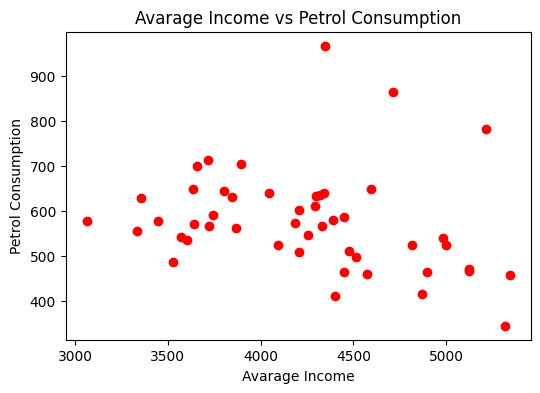

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(df['Average_income'],df['Petrol_Consumption'],c='r',marker='o')
plt.title('Avarage Income vs Petrol Consumption')
plt.xlabel('Avarage Income')
plt.ylabel('Petrol Consumption')
plt.show()

as u can see there is somewhat strong relationship  between these two variables.u can see outliers also.

Train The Model

In [18]:
y = df['Petrol_Consumption']
x = df[['Average_income','Paved_Highways','Population_Driver_licence(%)','Petrol_tax']]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [22]:
regressor.intercept_

np.float64(361.45087906668397)

In [23]:
regressor.coef_

array([-5.65355145e-02, -4.38217137e-03,  1.34686930e+03, -3.69937459e+01])

make predictions

In [24]:
y_predict = regressor.predict(x_test)

In [25]:
results = pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
print(results)

    Actual   Predicted
27     631  606.692665
40     587  673.779442
26     577  584.991490
43     591  563.536910
24     460  519.058672
37     704  643.461003
12     525  572.897614
19     640  687.077036
4      410  547.609366
25     566  530.037630


Evaluating model

In [26]:
from numpy._core.fromnumeric import mean
from sklearn.metrics import mean_squared_error
MAE = mean_squared_error(y_test,y_predict)
print(MAE)
MSE = mean_squared_error(y_test,y_predict)
print(MSE)
RMSE = np.sqrt(MSE)
print(RMSE)

4083.2558717442635
4083.2558717442635
63.9003589328281


In [27]:
regressor.score(x_test,y_test)


0.39136640014305457

In [28]:
regressor.score(x_train,y_train)

0.7068781342155135